In [ ]:
!pip install rarfile

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import rarfile

def extract_rar(file_path, extract_path):
    with rarfile.RarFile(file_path, 'r') as rar:
        rar.extractall(extract_path)

# Example usage
separaterar_file_path = '/content/drive/MyDrive/Colab Notebooks/Workshop/ImageClassificationDL/set_separate.rar'
#daysrar_file_path = '/content/drive/MyDrive/Colab Notebooks/Workshop/ImageClassificationDL/daysCSV.rar'
extract_path = '/content/datasets/'

extract_rar(separaterar_file_path, extract_path)
#extract_rar(daysrar_file_path, extract_path)

In [ ]:
import imp
imp.reload(torch)

RuntimeError: Only a single TORCH_LIBRARY can be used to register the namespace triton; please put all of your definitions in a single TORCH_LIBRARY block.  If you were trying to specify implementations, consider using TORCH_LIBRARY_IMPL (which can be duplicated).  If you really intended to define operators for a single namespace in a distributed way, you can use TORCH_LIBRARY_FRAGMENT to explicitly indicate this.  Previous registration of TORCH_LIBRARY was registered at /dev/null:1782; latest registration was registered at /dev/null:1782

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os



# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



In [ ]:
# Define the data directory
data_dir = '/content/datasets/set_separate'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

#image_datasets
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=2) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names



{'train': 9650, 'val': 2414}


['0', '1', '2', '3', '4']

In [ ]:
# Load the pre-trained ResNet-18 model
#model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)   # Use all parameters

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

NameError: name 'model' is not defined

In [ ]:
# Training loop
num_epochs = 90
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

train Loss: 0.6320 Acc: 0.7629
val Loss: 0.2241 Acc: 0.9263
train Loss: 0.6245 Acc: 0.7689
val Loss: 0.1953 Acc: 0.9412
train Loss: 0.6173 Acc: 0.7686
val Loss: 0.1882 Acc: 0.9474
train Loss: 0.6284 Acc: 0.7661
val Loss: 0.2039 Acc: 0.9345
train Loss: 0.6031 Acc: 0.7737
val Loss: 0.2154 Acc: 0.9316
train Loss: 0.6270 Acc: 0.7684
val Loss: 0.1844 Acc: 0.9486
train Loss: 0.6007 Acc: 0.7775
val Loss: 0.1899 Acc: 0.9437
train Loss: 0.6108 Acc: 0.7722
val Loss: 0.2172 Acc: 0.9279
train Loss: 0.6064 Acc: 0.7753
val Loss: 0.2472 Acc: 0.9176
train Loss: 0.6040 Acc: 0.7716
val Loss: 0.1863 Acc: 0.9474
train Loss: 0.6029 Acc: 0.7754
val Loss: 0.1750 Acc: 0.9528
train Loss: 0.5890 Acc: 0.7831
val Loss: 0.2060 Acc: 0.9341
train Loss: 0.6089 Acc: 0.7743
val Loss: 0.1870 Acc: 0.9432
train Loss: 0.6098 Acc: 0.7719
val Loss: 0.1815 Acc: 0.9457
train Loss: 0.6150 Acc: 0.7727
val Loss: 0.1793 Acc: 0.9486
train Loss: 0.6072 Acc: 0.7731
val Loss: 0.1847 Acc: 0.9457
train Loss: 0.5987 Acc: 0.7759
val Loss:

In [ ]:
# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/Workshop/ImageClassificationDL/resnetcctvclassification100_model.pth')
import torch
from torchvision import models, transforms
from PIL import Image

In [ ]:
!nvidia-smi

Sun Jan 14 23:47:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              39W / 300W |    654MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load('/content/drive/MyDrive/Colab Notebooks/Workshop/ImageClassificationDL/resnetcctvclassification100_model.pth'))
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2)  # Adjust to match the desired output units

# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:2]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:2]

In [ ]:

# no run Load and preprocess the unseen image
image_path = 'test.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension
# Perform inference
with torch.no_grad():
    output = model(inputbatch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['0', '1', '2', '3', '4' ]  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

NameError: name 'Image' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# no run Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()

NameError: name 'image' is not defined

In [ ]:
import seaborn as sns

In [ ]:
def mod_make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cf using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    percent:       If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    title:         Title for the heatmap. Default is None.
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        # Normalize the confusion matrix row-wise
        cf_percentage = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]
        group_percentages = ["{0:.2%}".format(value) for value in cf_percentage.flatten()]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # If it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize is None:
        # Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks is False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf_percentage, annot=box_labels, fmt="", cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

# Example usage:
# make_confusion_matrix(your_confusion_matrix, categories=['Class 0', 'Class 1'], title='Confusion Matrix')

folder name:  0
folder name:  2
folder name:  1
folder name:  3
0.03620765785655712
              precision    recall  f1-score   support

           0       0.05      0.37      0.10      1753
           1       0.99      0.01      0.03     29854
           2       0.00      0.00      0.00         0
           3       0.03      0.98      0.06        99

    accuracy                           0.04     31706
   macro avg       0.27      0.34      0.04     31706
weighted avg       0.94      0.04      0.03     31706



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-8-36884f435742>:48: RuntimeWarning: invalid value encountered in divide
 

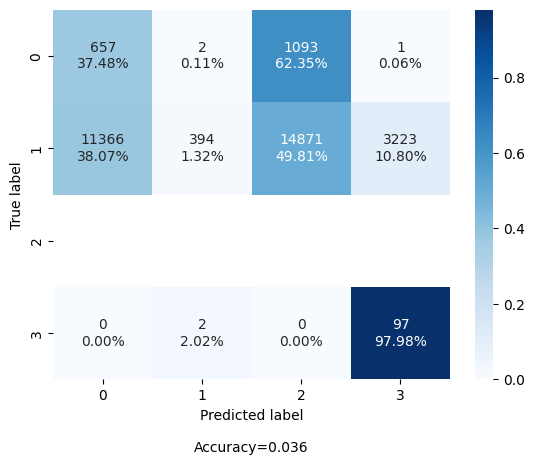

In [ ]:
import os
import matplotlib.pyplot as plt

main_folder_path = '/content/datasets/day20'

y_real=[]
y_predicted=[]
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)
    print("folder name: ", folder_name)
    # Check if the item in the main folder is a subfolder
    if os.path.isdir(folder_path):
        # Iterate through each image in the subfolder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)

            y_real.append(int(folder_name))

            image = Image.open(image_path)
            preprocess = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ])
            input_tensor = preprocess(image)
            input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

            # Perform inference
            with torch.no_grad():
                output = model(input_batch)

            # Get the predicted class
            _, predicted_class = output.max(1)

            # Map the predicted class to the class name
            class_names = ['0', '1', '2', '3', '4']  # Make sure these class names match your training data
            predicted_class_name = class_names[predicted_class.item()]
            y_predicted.append(int(predicted_class_name))

    #print(f'The predicted class is: {predicted_class_name}')

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

score_svc = accuracy_score(y_predicted, y_real)

print(score_svc)

print(classification_report(y_predicted, y_real))
cf =confusion_matrix(y_predicted, y_real)
mod_make_confusion_matrix(cf)

0.9034144799241227
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3758
           1       0.76      0.12      0.20       689
           2       0.99      0.89      0.94      5084
           3       0.73      0.98      0.84      3121
           4       0.00      0.00      0.00         0

    accuracy                           0.90     12652
   macro avg       0.70      0.60      0.60     12652
weighted avg       0.92      0.90      0.89     12652



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-8-36884f435742>:48: RuntimeWarning: invalid value encountered in divide
 

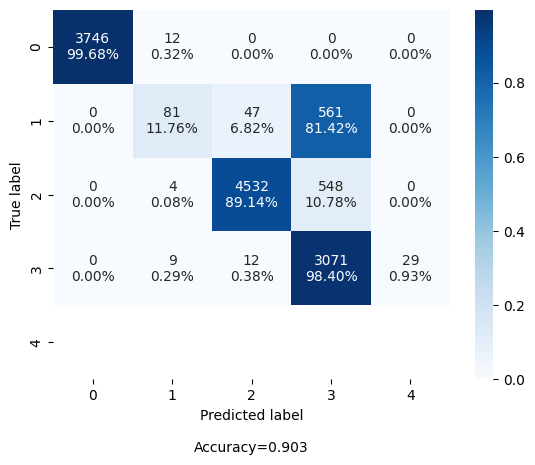

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

score_svc = accuracy_score(y_predicted, y_real)

print(score_svc)

print(classification_report(y_predicted, y_real))
cf =confusion_matrix(y_predicted, y_real)
mod_make_confusion_matrix(cf)

In [ ]:
if torch.cuda.is_available():
  model.cuda()

In [ ]:
import os
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

0.9022288966171357
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3774
           1       0.71      0.10      0.17       768
           2       0.99      0.91      0.95      4999
           3       0.73      0.98      0.84      3111
           4       0.00      0.00      0.00         0

    accuracy                           0.90     12652
   macro avg       0.69      0.60      0.59     12652
weighted avg       0.91      0.90      0.89     12652



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-19-36884f435742>:48: RuntimeWarning: invalid value encountered in divide


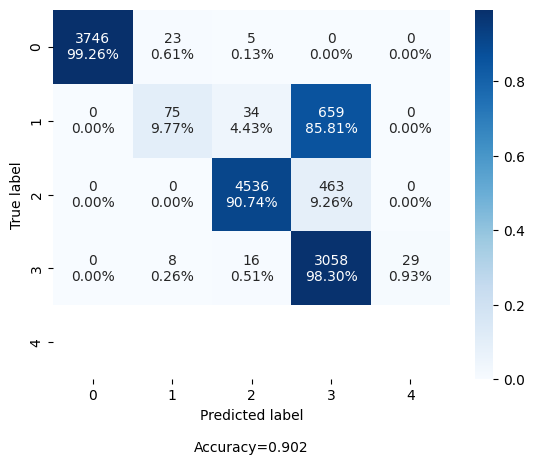

In [ ]:
score_svc = accuracy_score(y_predicted, y_real)

print(score_svc)

print(classification_report(y_predicted, y_real))
cf =confusion_matrix(y_predicted, y_real)
mod_make_confusion_matrix(cf)

  0%|          | 0/605 [00:11<?, ?batch/s]


ValueError: too many values to unpack (expected 2)